## 1번
데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
- Description: Product (item) name. Nominal.    
- Quantity: The quantities of each product (item) per transaction. Numeric.     
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
- Country: Country name. Nominal, the name of the country where each customer resides.     

### 1-1. 
결측치를 확인하고, 결측치 제거할 것

In [99]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


In [100]:
# 결측치 확인
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64

In [101]:
df = df.dropna()

### 1-2. 
이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

이상치를 판단하는 방법  
+ IQR 방식을 이용한 이상치 탐지
    + IQR = Q3 - Q1 으로 하고 Q3 + 1.5*IQR, Q1 - 1.5*IQR 바깥 범위 값을 이상치로 간주

이상치가 전체 데이터에서 매우 적은 부분을 가지고 있으면 이상치를 대체하지 않고 제거하기도 한다.

Qunatity 와 UnitPrice 의 이상치를 탐지하고 제거하자.

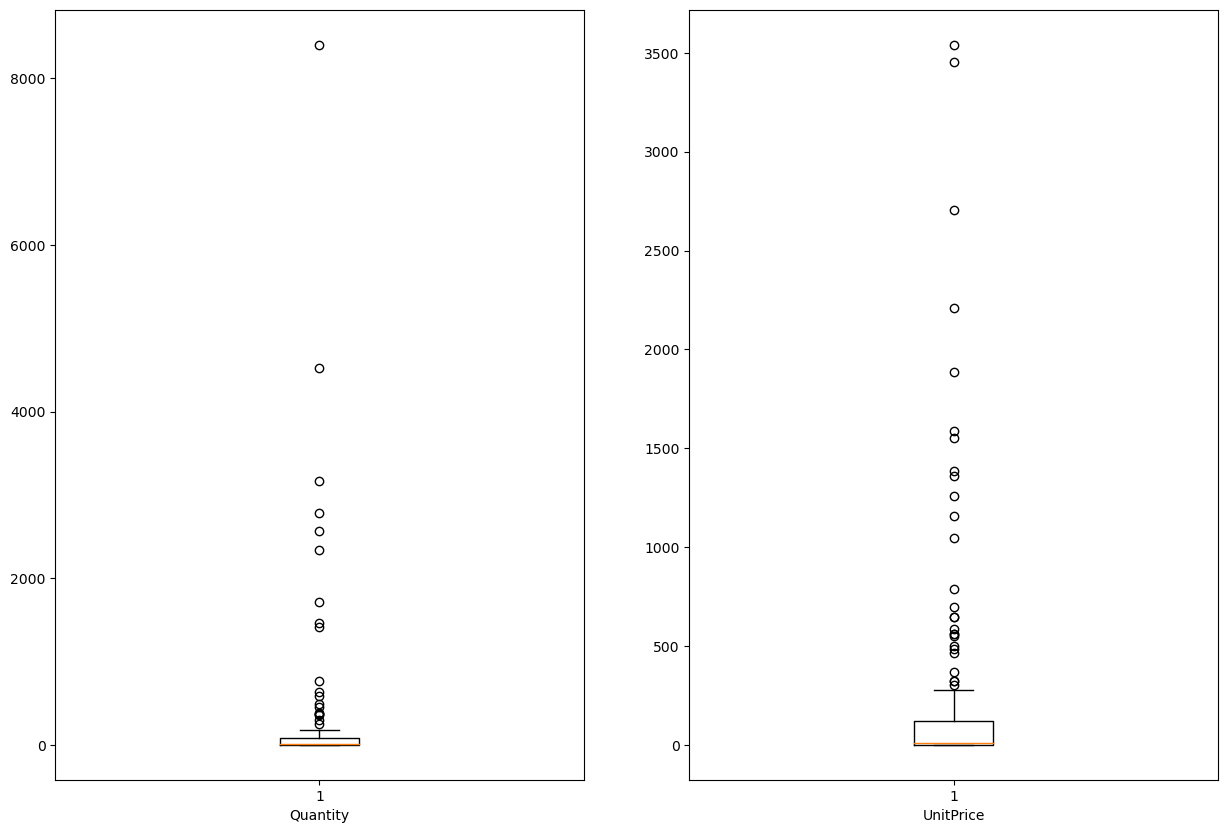

In [102]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (15, 10))
ax[0].boxplot(df['Quantity'].value_counts())
ax[0].set_xlabel('Quantity')
ax[1].boxplot(df['UnitPrice'].value_counts())
ax[1].set_xlabel('UnitPrice')
plt.show()

이상치의 위치를 찾아보자.

In [103]:
# Quantity 변수의 이상치
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
IQR = df['Quantity'].quantile(0.75) - df['Quantity'].quantile(0.25)
outlier_quan = df[(df['Quantity'] > q3 + 1.5*IQR) | (df['Quantity'] < q1 - 1.5*IQR)]

print(outlier_quan.head())
print('Quantity 이상치 비율 {:.2f}%'.format((outlier_quan.shape[0] / df.shape[0])*100))

   InvoiceNo StockCode                    Description  Quantity  \
7     558628     37340  MULTICOLOUR SPRING FLOWER MUG      48.0   
20    561901     22950   36 DOILIES VINTAGE CHRISTMAS     288.0   
24    544479     22078       RIBBON REEL LACE DESIGN      120.0   
25    544573     20973  12 PENCIL SMALL TUBE WOODLAND     144.0   
30    548606     22398     MAGNETS PACK OF 4 SWALLOWS      60.0   

        InvoiceDate  UnitPrice  CustomerID      Country  
7   6/30/2011 17:59       0.39     12626.0      Germany  
20  7/31/2011 15:42       1.45     14156.0         EIRE  
24  2/21/2011 10:28       1.85     14646.0  Netherlands  
25  2/21/2011 13:40       0.65     12621.0      Germany  
30   4/1/2011 11:10       1.25     12731.0       France  
Quantity 이상치 비율 10.43%


In [104]:
# UnitPrice 변수의 이상치
q1 = df['UnitPrice'].quantile(0.25)
q3 = df['UnitPrice'].quantile(0.75)
IQR = df['UnitPrice'].quantile(0.75) - df['UnitPrice'].quantile(0.25)
outlier_price = df[(df['UnitPrice'] > q3 + 1.5*IQR) | (df['UnitPrice'] < q1 - 1.5*IQR)]

print(outlier_price.head())
print('UnitPrice 이상치 비율 {:.2f}%'.format((outlier_price.shape[0] / df.shape[0])*100))

   InvoiceNo StockCode                 Description  Quantity  \
8    C540243     22606  WOODEN SKITTLES GARDEN SET      -1.0   
13    544996      POST                     POSTAGE       2.0   
15    540469     48111       DOORMAT 3 SMILEY CATS       1.0   
29    566173      POST                     POSTAGE       1.0   
35    539421     22929      SCHOOL DESK AND CHAIR        1.0   

         InvoiceDate  UnitPrice  CustomerID      Country  
8     1/5/2011 15:32      15.95     12585.0      Germany  
13   2/25/2011 11:53      18.00     12474.0      Germany  
15    1/7/2011 14:04       7.95     12484.0        Spain  
29    9/9/2011 12:24      15.00     12787.0  Netherlands  
35  12/17/2010 14:21      65.00     14016.0         EIRE  
UnitPrice 이상치 비율 12.14%


In [105]:
index1 = set(outlier_price.index) 
index2 = set(outlier_quan.index)
index3 = list(index1.union(index2))

df_noout = df.loc[[x for x in df.index if x not in index3], :].reset_index(drop = True)
df_noout

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France
...,...,...,...,...,...,...,...,...
27652,579393,21670,BLUE SPOT CERAMIC DRAWER KNOB,12.0,11/29/2011 12:07,1.45,12627.0,Germany
27653,554137,21668,RED STRIPE CERAMIC DRAWER KNOB,12.0,5/23/2011 10:13,1.25,12708.0,Germany
27654,572986,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,6.0,10/27/2011 10:51,3.25,12681.0,France
27655,579927,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6.0,12/1/2011 9:20,2.89,12572.0,Germany


In [106]:
print('original :', df.shape)
print('Drop outlier :', df_noout.shape)

original : (35679, 8)
Drop outlier : (27657, 8)


In [107]:
df_noout[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,27657.000000,27657.000000
mean,10.677839,2.192739
std,7.108201,1.509555
min,-14.000000,0.000000
25%,6.000000,1.250000
50%,10.000000,1.650000
75%,12.000000,2.950000
max,34.000000,7.500000


+ 비즈니스적으로 생각했을 때, 상품 price가 0인 것은 이상치라고 할 수 있다.
+ Quantity 가 음수인 것은 이상치라고 할 수 있다.

In [108]:
df_noout = df_noout[df_noout['Quantity'] > 0]
df_noout = df_noout[df_noout['UnitPrice'] > 0]

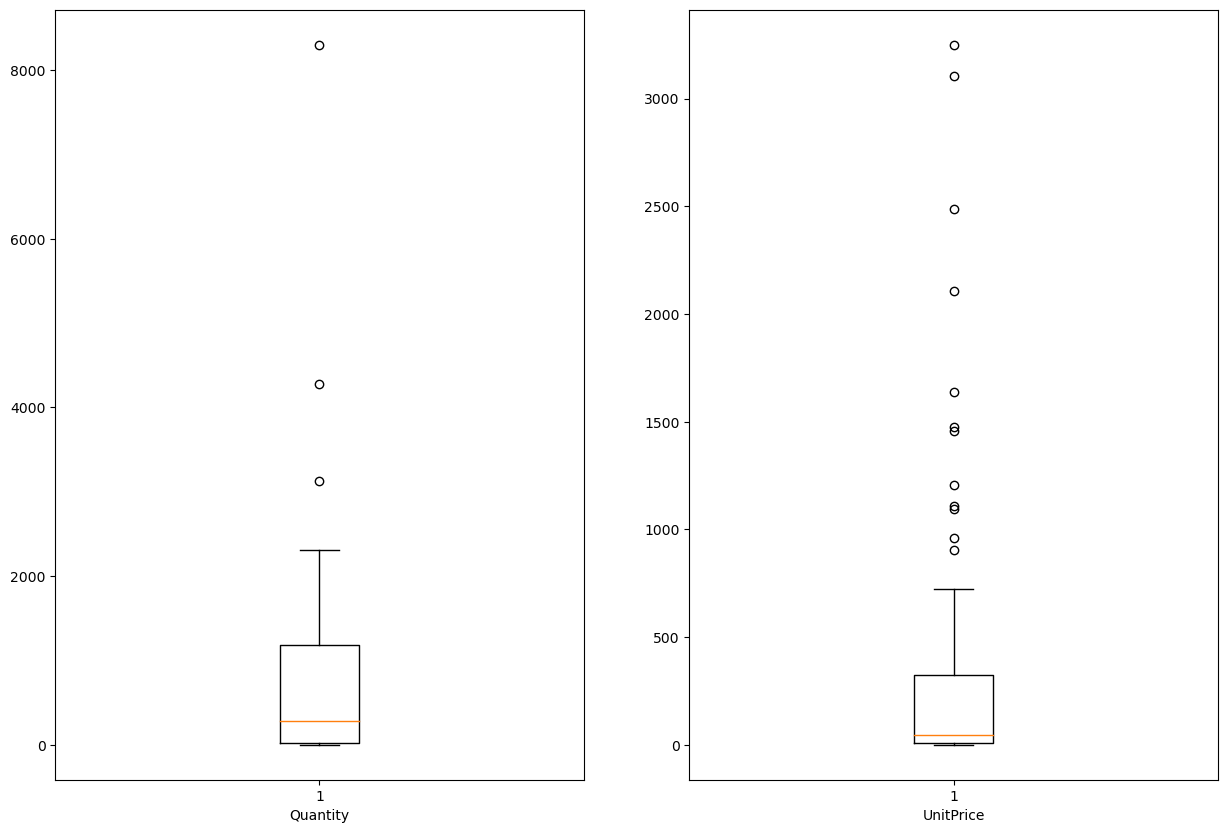

In [109]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (15, 10))
ax[0].boxplot(df_noout['Quantity'].value_counts())
ax[0].set_xlabel('Quantity')
ax[1].boxplot(df_noout['UnitPrice'].value_counts())
ax[1].set_xlabel('UnitPrice')
plt.show()

### 1-3 
전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것


K-means의 장점
+ 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
+ 알고리즘이 쉽고 간결하다.

K-means의 단점
+ 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다.
+ 이를 위해 PCA로 차원을 축소하고 적용해야할 필요가 있을 수도 있다.
+ 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 느려진다.
+ 몇 개의 군집을 선택해야 할지가 하이퍼파라미터로 정해져 있어 가이드하기 어렵다.

In [110]:
df_noout1 = df_noout[['Quantity', 'UnitPrice']]

In [111]:
import warnings
warnings.filterwarnings(action='ignore')

In [112]:
# 군집분석 전 표준화작업 수행하자.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_noout1), columns = df_noout1.columns)
df_scaled

,Quantity,UnitPrice
0,-0.741533,-0.153655
1,0.141381,-0.617941
2,0.141381,-0.617941
3,1.907208,-0.617941
4,-0.152924,-0.617941
...,...,...
26971,0.141381,-0.485288
26972,0.141381,-0.617941
26973,-0.741533,0.708592
26974,-0.741533,0.469816


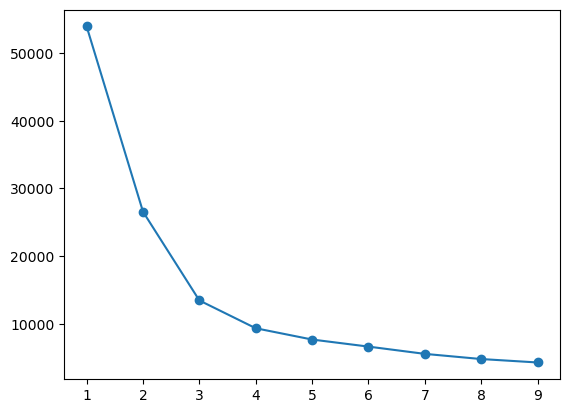

,0
2,0.472897
3,0.547374
4,0.514367
5,0.491584
6,0.496022
7,0.462236
8,0.459983
9,0.461245


In [77]:
# KMeans 군집분석
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
I = [] # 오차제곱합 
sil_kmean = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    if k > 1:
        sil_kmean.append(silhouette_score(df_scaled, kmeans.labels_))
    I.append(kmeans.inertia_)

plt.plot(list(range(1, 10)), I, marker = 'o')
plt.show()

sil = pd.DataFrame(sil_kmean, index = list(range(2,10)))
sil

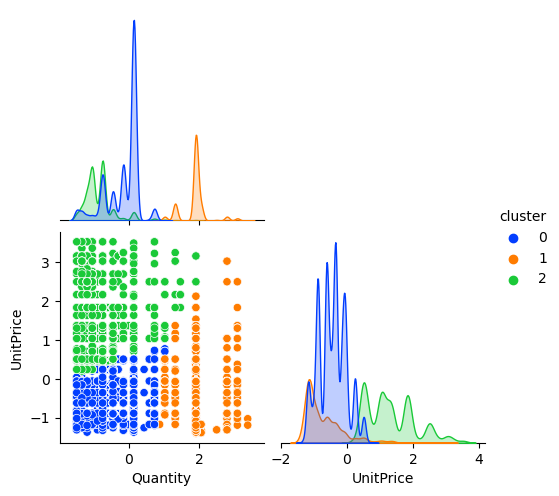

In [84]:
# Elbow 방법과 실루엣 계수 모두 3개 군집이 적당하다고 판단된다.
kmeans = KMeans(n_clusters=3).fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

# 군집
import seaborn as sns
sns.pairplot(df_scaled,
             diag_kind = 'kde',
             hue = 'cluster',
             palette = 'bright',
             corner = True)

plt.show()

## 2번
### 2-1. 
위에서 생성한 군집들의 특성을 분석할 것

In [114]:
df_noout1['cluster'] = kmeans.labels_
df_noout1.groupby('cluster').mean()

,Quantity,UnitPrice
cluster,,
0,10.010756,1.500130
1,23.723298,1.097981
2,5.306944,4.196881


+ 0번 클러스터는 Quantity 가 중간이고 UnitPrice 가 작은 상품을 구매하는 고객
+ 1번 클러스터는 Quantity 가 매우 높고 UnitPrice 가 작은 상품을 구매하는 고객
+ 2번 클러스터는 Quantity 가 작지만 UnitPrice 는 높은 고객

### 2-2. 
각 군집 별 대표 추천 상품을 도출할 것

In [128]:
df_noout['cluster'] = kmeans.labels_
df_noout.groupby('cluster')['Description'].value_counts()[0]

Description
PLASTERS IN TIN WOODLAND ANIMALS    144
PLASTERS IN TIN CIRCUS PARADE       130
SPACEBOY LUNCH BOX                  122
PLASTERS IN TIN SPACEBOY            118
RED TOADSTOOL LED NIGHT LIGHT        97
                                   ... 
UNION STRIPE CUSHION COVER            1
VINTAGE BILLBOARD TEA MUG             1
VINTAGE CHRISTMAS CAKE FRILL          1
VINTAGE RED MUG                       1
 4 PURPLE FLOCK DINNER CANDLES        1
Name: count, Length: 1624, dtype: int64

+ 0번 클러스터는 PLASTERS IN TIN WOODLAND ANIMALS 추천

In [131]:
df_noout.groupby('cluster')['Description'].value_counts()[1]

Description
PACK OF 72 RETROSPOT CAKE CASES        120
SET/10 RED POLKADOT PARTY CANDLES       61
SET OF 60 PANTRY DESIGN CAKE CASES      52
SET/10 PINK POLKADOT PARTY CANDLES      49
SET/10 BLUE POLKADOT PARTY CANDLES      41
                                      ... 
WOODLAND PARTY BAG + STICKER SET         1
WOODLAND MINI BACKPACK                   1
ZINC  STAR T-LIGHT HOLDER                1
WRAP, CAROUSEL                           1
WRAP KEEP CALM BIRTHDAY                  1
Name: count, Length: 1017, dtype: int64

+ 1번 클러스터는 PACK OF 72 RETROSPOT CAKE CASES 추천

In [132]:
df_noout.groupby('cluster')['Description'].value_counts()[2]

Description
ROUND SNACK BOXES SET OF4 WOODLAND     141
ROUND SNACK BOXES SET OF 4 FRUITS      107
SET OF 3 REGENCY CAKE TINS             102
RETROSPOT TEA SET CERAMIC 11 PC        101
BAKING SET 9 PIECE RETROSPOT            98
                                      ... 
ANT COPPER TURQ BOUDICCA BRACELET        1
ANT COPPER PINK BOUDICCA BRACELET        1
3 GARDENIA MORRIS BOXED CANDLES          1
12 PINK HEN+CHICKS IN BASKET             1
 I LOVE LONDON MINI RUCKSACK             1
Name: count, Length: 830, dtype: int64

+ 2번 클러스터는 ROUND SNACK BOXES SET OF4 WOODLAND  추천

### 2-3. 
CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

In [137]:
df_noout[df_noout['CustomerID'] == 12413.0]['cluster'].value_counts()

cluster
0    18
2    12
1     1
Name: count, dtype: int64

+ 이 고객은 구매 성향이 0번 클러스터를 따른다. 즉 PLASTERS IN TIN WOODLAND ANIMALS 을 추천하겠다.

## 3번
철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [142]:
from scipy.stats import norm
p = 0.9 # 모비율
ME = 0.05
conf_a = 0.05
conf_z = norm.ppf(1-conf_a/2)
ssize = conf_z **2 * p * (1-p) / ME**2
ssize

138.29251754498844

## 4번
다음은 1월부터 9월까지의 은의 가격이다

In [138]:
month = pd.DataFrame([12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38], index=['1월','2월','3월','4월','5월','6월','7월','8월','9월'], columns = ['USD/oz'])
month

,USD/oz
1월,12.14
2월,42.60
3월,34.40
4월,35.29
5월,30.96
6월,57.12
7월,37.84
8월,42.49
9월,31.38


### 4-1 
은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

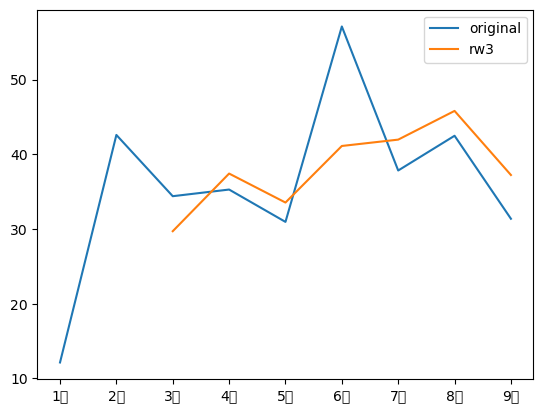

In [141]:
rw3 = month.rolling(window=3).mean().dropna()
plt.plot(month.index , month['USD/oz'])
plt.plot(rw3.index, rw3['USD/oz'])
plt.legend(['original', 'rw3'])
plt.show()

### 4-2 
1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [102]:
month

,USD/oz
1월,12.14
2월,42.60
3월,34.40
4월,35.29
5월,30.96
6월,57.12
7월,37.84
8월,42.49
9월,31.38


In [108]:
jan = month.values[0]
sep = month.values[-1]

print(((sep - jan)/jan) * 100)

[158.48434926]


## 5번 
A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라

In [124]:
df = pd.DataFrame({'A' : [176, 124], 'B' : [193, 107], 'C' : [159, 141]}, index = ['찬성', '반대'])
df

,A,B,C
찬성,176,193,159
반대,124,107,141


## 5-1 
연구가설과 귀무가설을 설정하라

In [125]:
# 동질성 검정
# H0 : 자치구별 지지율이 같다.
# H1 : 자치구별 지지율이 다르다.

## 5-2 
검정통계량 구하고 결론을 내라

In [126]:
from scipy.stats import chi2_contingency

statistic, pvalue , df, expect = chi2_contingency(df)
print(statistic, pvalue)

# 귀무가설을 기각한다. 즉 지지율이 다르다.

7.945381231671554 0.01882272023214683


## 6번 
A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 problem6.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

In [2]:
import pandas as pd

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem6.csv')
data.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


### 6-1. 
연구가설과 귀무가설 설정하라

In [9]:
# H0 : 남녀 혈압의 평균은 같다.
# H1 : 남녀 혈압의 평균은 다르다.

### 6-2. 
통계량을 구하고, 연구가설 채택여부를 기술하라.

In [7]:
# 독립표본 T 검정
from scipy.stats import ttest_ind

male = data[data['gender'] == 'male']
female = data[data['gender'] == 'female']

ttest_ind(male['pressure'], female['pressure'], equal_var=True, alternative='two-sided')

#r 귀무가설을 기각할 수 없다. 즉 남녀 혈압의 평균은 같다.

Ttest_indResult(statistic=1.3813481801194591, pvalue=0.18044550626193734)

### 6-3. 
6-2에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [6]:
from scipy.stats import t
import numpy as np
mean_m = male['pressure'].mean()
mean_f = female['pressure'].mean()

std_m = male['pressure'].std(ddof=1)
std_f = female['pressure'].std(ddof=1)

n1, n2 = 16, 9
d = mean_m - mean_f
conf_a = 0.05 # 신뢰수준

# 합동표본분반 Sp
Sp = np.sqrt(((n1-1)*(std_m**2) + (n2-1)*(std_f**2)) / (n1+n2-2))
SE = np.sqrt(Sp) * np.sqrt(1/n1 + 1/n2)

tstats = t.ppf(1-conf_a/2, 23)
ME = tstats * SE

d + ME, d - ME

(7.91125893283009, 2.681796622725476)

## 7번 
height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라.
- A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.      
- 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem7.csv')
data

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
...,...,...,...
406,174.207,73.736,80.1779
407,174.702,74.529,80.1306
408,176.858,76.083,80.4527
409,175.566,76.459,80.2019


### 7-1 
아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [3]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

X = data.drop(['weight'], axis = 1)
y = data['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bayes = BayesianRidge(n_iter = 1000, fit_intercept= False, lambda_1=0.005, lambda_2=0.005)
bayes.fit(X_train, y_train)

bayes.coef_

array([ 1.09250024, -1.45389915])

### 7-2 
7-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라